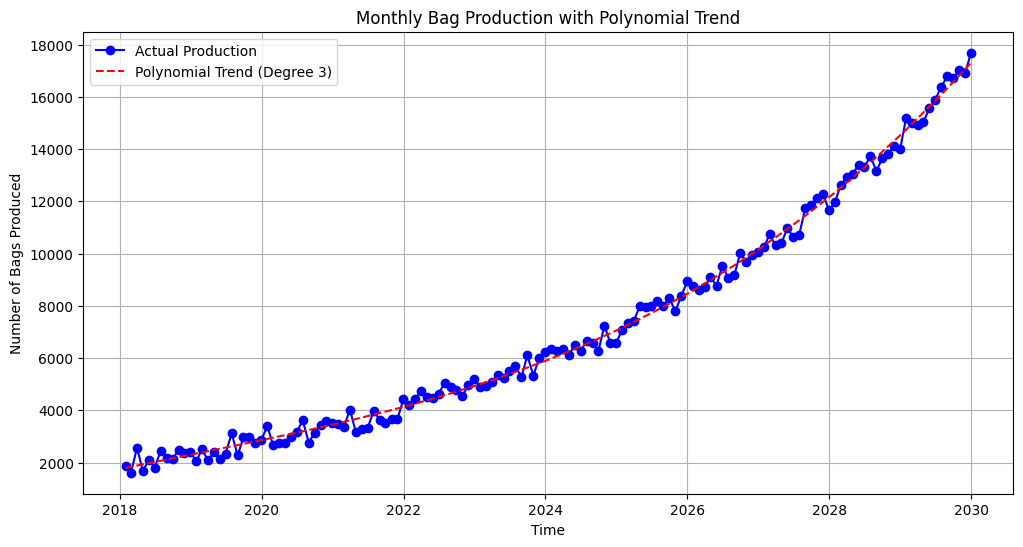

Polynomial Coefficients: ['0.004', '-0.123', '46.966', '1795.600']
Production exceeds 25,000 bags in: 2032-02
Start building the new warehouse by: 2031-01
Root Result (Month when production exceeds 25,000 bags): 169.374
Month to start building the warehouse: 156.374


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Load the Excel file
file_path = 'data.xlsx'
data = pd.read_excel(file_path, sheet_name='in')

# Extract the production data
production_data = data.iloc[0].values

# Create a timeline from January 2018 to December 2023
timeline = pd.date_range(start='2018-01', periods=len(production_data), freq='ME')

# Problem 1: Polynomial Regression Model
months_since_start = np.arange(len(production_data))

# Fit a polynomial of degree 3 using numpy's polyfit and poly1d
degree = 3
coefficients = np.polyfit(months_since_start, production_data, degree)
p = np.poly1d(coefficients)

# Evaluate the polynomial model
production_trend = p(months_since_start)

# Plot the production data and the polynomial trend
plt.figure(figsize=(12, 6))
plt.plot(timeline, production_data, marker='o', linestyle='-', color='b', label='Actual Production')
plt.plot(timeline, production_trend, linestyle='--', color='r', label=f'Polynomial Trend (Degree {degree})')
plt.title('Monthly Bag Production with Polynomial Trend')
plt.xlabel('Time')
plt.ylabel('Number of Bags Produced')
plt.legend()
plt.grid(True)
plt.show()

# Display the polynomial coefficients with three-digit precision
print("Polynomial Coefficients:", [f"{coef:.3f}" for coef in coefficients])

# Problem 2: Polynomial Function (Numerical Approximation)
def production_model(x):
    return coefficients[0] * x**3 + coefficients[1] * x**2 + coefficients[2] * x + coefficients[3]

# Problem 3: Warehouse Capacity Prediction
def root_function(x):
    return production_model(x) - 25000

# Find the root (prediction when production exceeds 25,000 bags)
root_result = fsolve(root_function, x0=months_since_start[-1])
exceed_month = root_result[0]

# Calculate when to start building the new warehouse (13 months before exceeding capacity)
build_start_month = exceed_month - 13

# Convert months since start to date
exceed_date = pd.Timestamp('2018-01-01') + pd.DateOffset(months=int(exceed_month))
build_start_date = pd.Timestamp('2018-01-01') + pd.DateOffset(months=int(build_start_month))

print(f"Production exceeds 25,000 bags in: {exceed_date.strftime('%Y-%m')}")
print(f"Start building the new warehouse by: {build_start_date.strftime('%Y-%m')}")

# Output the root results with three-digit precision
print(f"Root Result (Month when production exceeds 25,000 bags): {exceed_month:.3f}")
print(f"Month to start building the warehouse: {build_start_month:.3f}")
